In [2]:
from xgboost import XGBClassifier
from sklearn.svm import SVC

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import random
from sklearn.utils import shuffle
from xgboost import XGBClassifier

In [34]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD

In [28]:
def get_feature_importance(dfX, dfy, model):
            
    model.fit(dfX, dfy)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    
    
    res_importance_df = pd.DataFrame(\
                            columns=['index_num', 'feature_name', 'importance'], \
                                     index=range(dfX.shape[1]))
    
    for f in range(dfX.shape[1]):
        print("%d. [index %d] %s (%f)" % (f + 1, indices[f], dfX.columns[indices[f]], importances[indices[f]]))
        
        res_importance_df.iloc[f].index_num = indices[f]
        res_importance_df.iloc[f].feature_name = dfX.columns[indices[f]]
        res_importance_df.iloc[f].importance = importances[indices[f]]
        
    return res_importance_df


In [29]:
def do_kfold_cv(dfX, dfy, model, num_splits):
    
    #kf = KFold(n_splits=num_splits, shuffle=True, random_state=0)

    scores = cross_val_score(model, dfX, dfy, scoring='accuracy',cv=num_splits)
    
    print('K-Fold number of splits:', num_splits)
    print(scores)
    print(np.mean(scores))
    
    return (np.mean(scores))

In [30]:
def make_submission_csv(model, Xtrain, y, Xtest, filename):
    
    model_f = model.fit(Xtrain, y)
    pred_ = pd.DataFrame(model_f.predict(Xtest), columns=['Cover_Type'], index=None)
    submit = pd.concat([test_df.Id, pred_], axis=1)
    submit.to_csv(filename, sep=',')

In [31]:
def drop_allzero_column(df):
    
    li = []
    for col in df.columns:
        
        if len(df[col].unique()) == 1:
           
            li.append(col)
            
    return df.drop(li, axis=1)

In [32]:
def draw_decomp(X, decomp, dim, y=None, fit=False):
    # test weight dictionary in LDA 2d
    if not fit:
        dec = decomp(n_components=dim)
        if not y:
            X_2d = dec.fit_transform(X)
        else:
            X_2d = dec.fit_transform(X, y)

    plt.scatter(X_2d[:,0], X_2d[:,1], c=y, s=10, cmap=plt.cm.RdYlGn)
    plt.colorbar()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('First two PCs using digits data')
    plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v', 'd', '*')
    colors = ('b', 'g', 'r', 'c', 'm', 'y', 'w')
    #cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1,X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    #plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.RdYlGn)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    #for idx, cl in enumerate(np.unique(y)):
    #    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    #               alpha=0.8, c=cmap(idx),
    #               marker=markers[idx], label=cl)
     
    plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap=plt.cm.RdYlGn)
    plt.colorbar()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('First two PCs using digits data')
    plt.show()

In [36]:
def draw_confmat(confmat):
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [13]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
y = train_df['Cover_Type']

In [14]:
X_scaled_test = pd.read_csv('data/X_scaled_test.csv')
X_scaled = pd.read_csv('data/X_scaled.csv')

In [15]:
X_scaled_ = drop_allzero_column(X_scaled)

In [16]:
X_scaled_.shape

(15120, 306)

In [17]:
#X_scaled = X_scaled.drop(['Unnamed: 0'], axis=1)
X_scaled_test = X_scaled_test.drop(['Unnamed: 0'], axis=1)

In [18]:
# kaggle test accuracy 0.799 feature set (train accuracy = 0.9)
X_scaled_bestset =\
        X_scaled[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                   'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                   'Hillshade_9am', 'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points',
                   'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
                   'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
                   'Soil_Type9', 'Soil_Type10', 'Soil_Type12', 'Soil_Type13',
                   'Soil_Type17', 'Soil_Type20', 'Soil_Type22', 'Soil_Type30',
                   'Soil_Type32', 'Soil_Type33', 'Soil_Type38', 'Soil_Type39',
                   'Elevation_Cover3', 'Elevation_Cover4', 'Elevation_Cover5',
                   'Diagnoal_Distance_To_Hydrology', 'Vertical_Distance_Sum_EH',
                   'Vertical_Distance_Diff_EH', 'Vertical_Distance_Div_EH_SQRD',
                   'Horizontal_Distance_Sum_HRF', 'Horizontal_Distance_Sum_HR',
                   'Horizontal_Distance_Sum_HF', 'Horizontal_Distance_Sum_RF',
                   'Horizontal_Distance_Diff_HRF', 'Horizontal_Distance_Diff_HR_SQRD',
                   'Horizontal_Distance_Diff_HF_SQRD', 'Horizontal_Distance_Diff_RF_SQRD',
                   'Horizontal_Distance_Mult_HR', 'Horizontal_Distance_Mult_RF',
                   'Hillshade_Sum', 'Hillshade_ratio_0912', 'Hillshade_ratio_1215',
                   'Radians_To_Hydrology']]

In [14]:
rf_default = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_importance = get_feature_importance(X_scaled_, y, rf_default)

Feature ranking:
1. [index 227] Vertical_Distance_Diff_EH (0.020502)
2. [index 229] Vertical_Distance_Diff_EH_CUBE (0.019313)
3. [index 228] Vertical_Distance_Diff_EH_SQRD (0.018950)
4. [index 166] Soil_Type (0.017931)
5. [index 209] Elevation_SQRD (0.017857)
6. [index 86] Elevation_log_wild_cdf_51 (0.017082)
7. [index 106] Elevation_log_wild_cdf_61 (0.016008)
8. [index 82] Elevation_log (0.014983)
9. [index 100] Elevation_log_cdf_3 (0.014911)
10. [index 94] Elevation_log_wild_cdf_11 (0.014612)
11. [index 102] Elevation_log_wild_cdf_31 (0.013803)
12. [index 92] Elevation_log_cdf_1 (0.013672)
13. [index 0] Elevation (0.013626)
14. [index 108] Elevation_log_cdf_4 (0.012333)
15. [index 210] Elevation_CUBE (0.012184)
16. [index 90] Elevation_log_wild_cdf_21 (0.011912)
17. [index 87] Elevation_log_pdf_2 (0.011512)
18. [index 91] Elevation_log_pdf_1 (0.010825)
19. [index 85] Elevation_log_wild_pdf_51 (0.010654)
20. [index 84] Elevation_log_cdf_5 (0.010619)
21. [index 89] Elevation_log_wild_p

In [15]:
# importance results stored in dataframe
random_forest_importance.iloc[:10]

,index_num,feature_name,importance
0,227,Vertical_Distance_Diff_EH,0.0205015
1,229,Vertical_Distance_Diff_EH_CUBE,0.0193126
2,228,Vertical_Distance_Diff_EH_SQRD,0.0189495
3,166,Soil_Type,0.0179315
4,209,Elevation_SQRD,0.0178566
5,86,Elevation_log_wild_cdf_51,0.0170823
6,106,Elevation_log_wild_cdf_61,0.0160083
7,82,Elevation_log,0.014983
8,100,Elevation_log_cdf_3,0.0149112
9,94,Elevation_log_wild_cdf_11,0.0146124


In [16]:
etc_gini = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='gini')
extra_tree_importance_gini = get_feature_importance(X_scaled_, y, etc_gini)

Feature ranking:
1. [index 92] Elevation_log_cdf_1 (0.017138)
2. [index 166] Soil_Type (0.016106)
3. [index 89] Elevation_log_wild_pdf_21 (0.015109)
4. [index 82] Elevation_log (0.014490)
5. [index 86] Elevation_log_wild_cdf_51 (0.014075)
6. [index 106] Elevation_log_wild_cdf_61 (0.014048)
7. [index 100] Elevation_log_cdf_3 (0.013560)
8. [index 171] Soils_Cover5 (0.013454)
9. [index 228] Vertical_Distance_Diff_EH_SQRD (0.013309)
10. [index 209] Elevation_SQRD (0.013048)
11. [index 88] Elevation_log_cdf_2 (0.012936)
12. [index 84] Elevation_log_cdf_5 (0.012920)
13. [index 0] Elevation (0.012882)
14. [index 90] Elevation_log_wild_cdf_21 (0.012419)
15. [index 229] Vertical_Distance_Diff_EH_CUBE (0.012173)
16. [index 227] Vertical_Distance_Diff_EH (0.011943)
17. [index 104] Elevation_log_cdf_6 (0.010768)
18. [index 179] Elevation_Cover6 (0.010498)
19. [index 210] Elevation_CUBE (0.010153)
20. [index 105] Elevation_log_wild_pdf_61 (0.010092)
21. [index 99] Elevation_log_pdf_3 (0.009988)
22.

In [17]:
extra_tree_importance_gini.iloc[:10]

,index_num,feature_name,importance
0,92,Elevation_log_cdf_1,0.0171378
1,166,Soil_Type,0.0161057
2,89,Elevation_log_wild_pdf_21,0.015109
3,82,Elevation_log,0.0144899
4,86,Elevation_log_wild_cdf_51,0.014075
5,106,Elevation_log_wild_cdf_61,0.0140482
6,100,Elevation_log_cdf_3,0.0135599
7,171,Soils_Cover5,0.0134536
8,228,Vertical_Distance_Diff_EH_SQRD,0.0133092
9,209,Elevation_SQRD,0.0130482


In [18]:
etc_ent = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='entropy')
extra_tree_importance_ent = get_feature_importance(X_scaled_, y, etc_ent)

Feature ranking:
1. [index 84] Elevation_log_cdf_5 (0.024336)
2. [index 86] Elevation_log_wild_cdf_51 (0.024327)
3. [index 90] Elevation_log_wild_cdf_21 (0.021199)
4. [index 179] Elevation_Cover6 (0.020377)
5. [index 88] Elevation_log_cdf_2 (0.019673)
6. [index 100] Elevation_log_cdf_3 (0.018562)
7. [index 92] Elevation_log_cdf_1 (0.016641)
8. [index 82] Elevation_log (0.016420)
9. [index 106] Elevation_log_wild_cdf_61 (0.016321)
10. [index 89] Elevation_log_wild_pdf_21 (0.014932)
11. [index 228] Vertical_Distance_Diff_EH_SQRD (0.014843)
12. [index 104] Elevation_log_cdf_6 (0.014743)
13. [index 87] Elevation_log_pdf_2 (0.014417)
14. [index 226] Vertical_Distance_Sum_EH_CUBE (0.013904)
15. [index 0] Elevation (0.013540)
16. [index 105] Elevation_log_wild_pdf_61 (0.013217)
17. [index 169] Soils_Cover3 (0.013191)
18. [index 166] Soil_Type (0.013065)
19. [index 229] Vertical_Distance_Diff_EH_CUBE (0.012727)
20. [index 227] Vertical_Distance_Diff_EH (0.012700)
21. [index 176] Elevation_Cove

In [19]:
extra_tree_importance_ent.iloc[:10]

,index_num,feature_name,importance
0,84,Elevation_log_cdf_5,0.0243357
1,86,Elevation_log_wild_cdf_51,0.0243266
2,90,Elevation_log_wild_cdf_21,0.021199
3,179,Elevation_Cover6,0.020377
4,88,Elevation_log_cdf_2,0.0196725
5,100,Elevation_log_cdf_3,0.018562
6,92,Elevation_log_cdf_1,0.0166411
7,82,Elevation_log,0.0164197
8,106,Elevation_log_wild_cdf_61,0.0163212
9,89,Elevation_log_wild_pdf_21,0.014932


In [42]:
do_kfold_cv(X_scaled, y, etc_ent, 5)

K-Fold number of splits: 5
[ 0.85648148  0.86044974  0.86871693  0.86640212  0.86706349]
0.863822751323


In [20]:
xgb_default = XGBClassifier(n_estimators=100, objective='multi:softmax')
xgboost_importance = get_feature_importance(X_scaled_, y, xgb_default)

Feature ranking:
1. [index 227] Vertical_Distance_Diff_EH (0.116531)
2. [index 0] Elevation (0.050216)
3. [index 252] Horizontal_Distance_Diff_RF (0.045651)
4. [index 166] Soil_Type (0.042047)
5. [index 83] Elevation_log_pdf_5 (0.035320)
6. [index 250] Horizontal_Distance_Diff_HR (0.031716)
7. [index 240] Horizontal_Distance_Sum_RF (0.028592)
8. [index 224] Vertical_Distance_Sum_EH (0.027631)
9. [index 264] Horizontal_Distance_Mult_RF (0.023066)
10. [index 262] Horizontal_Distance_Mult_HR (0.022105)
11. [index 238] Horizontal_Distance_Sum_HR (0.021864)
12. [index 87] Elevation_log_pdf_2 (0.019702)
13. [index 256] Horizontal_Distance_Diff_RF_SQRD (0.018981)
14. [index 274] Hillshade_Sum_0912 (0.017299)
15. [index 237] Horizontal_Distance_Sum_HRF (0.016579)
16. [index 249] Horizontal_Distance_Diff_HRF (0.016579)
17. [index 5] Horizontal_Distance_To_Roadways (0.016098)
18. [index 91] Elevation_log_pdf_1 (0.016098)
19. [index 233] Vertical_Distance_Mult_EH (0.016098)
20. [index 251] Horizo

In [21]:
xgboost_importance.iloc[:10]

,index_num,feature_name,importance
0,227,Vertical_Distance_Diff_EH,0.116531
1,0,Elevation,0.0502162
2,252,Horizontal_Distance_Diff_RF,0.0456511
3,166,Soil_Type,0.0420471
4,83,Elevation_log_pdf_5,0.0353196
5,250,Horizontal_Distance_Diff_HR,0.0317155
6,240,Horizontal_Distance_Sum_RF,0.028592
7,224,Vertical_Distance_Sum_EH,0.0276309
8,264,Horizontal_Distance_Mult_RF,0.0230658
9,262,Horizontal_Distance_Mult_HR,0.0221048


# Parameter Opt : GridSearch
### Parameters
[**RandomForestClassifier/ ExtraTreesClassifier**]
- **n_estimators**
- **criterion**
- **max_features** : int, float, string or None, optional (default=”auto”)
  * The number of features to consider when looking for the best split:
    * If int, then consider max_features features at each split.
    * If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    * If “auto”, then max_features=sqrt(n_features).
    * If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    * If “log2”, then max_features=log2(n_features).
    * If None, then max_features=n_features.
- **max_depth** : integer or None, optional (default=None)
    * The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **max_leaf_nodes** : int or None, optional (default=None)
  * Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_samples_split** : int, float, optional (default=2)
  * The minimum number of samples required to split an internal node:
    * If int, then consider min_samples_split as the minimum number.
    * If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.(Changed in version 0.18: Added float values for percentages.)
- **min_samples_leaf**
- **min_impurity_decrease**
  * A node will be split if this split induces a decrease of the impurity greater than or equal to this value.




### define parameter grids on Ensemble Classifiers

In [20]:
rf_default = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample")
do_kfold_cv(X_scaled, y, rf_default, 5)

K-Fold number of splits: 5
[ 0.74636243  0.7473545   0.76984127  0.78207672  0.8478836 ]
0.778703703704


0.77870370370370368

In [21]:
def draw_learning_curve(model, X_train, y_train, cv):
    train_sizes, train_scores, test_scores =\
        learning_curve(estimator=model,
                      X = X_train,
                      y=y_train,
                      train_sizes=np.linspace(0.1, 1, 10),
                      cv=cv,
                      n_jobs=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, color='b', marker='o', markersize=5,
            label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std,
                    train_mean - train_std, alpha=.15, color='b')
    plt.plot(train_sizes, test_mean, color='g', marker='s', linestyle='--',
            markersize=5, label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                    alpha=.15, color='g')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(0.5, 1.0)
    plt.show()
    

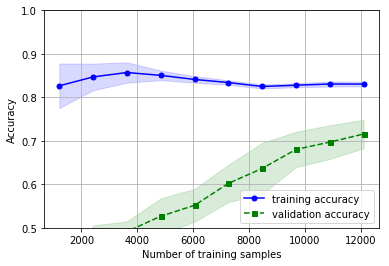

In [22]:
rf_test1 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample",
                                  min_samples_split=100)
draw_learning_curve(rf_test1, X_scaled, y, 5)

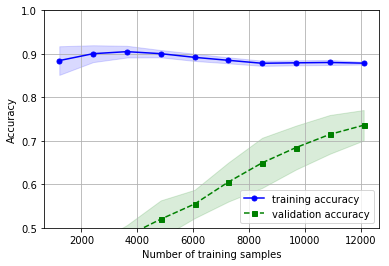

In [38]:
rf_test1 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample",
                                  min_samples_split=50)
draw_learning_curve(rf_test1, X_scaled, y, 5)

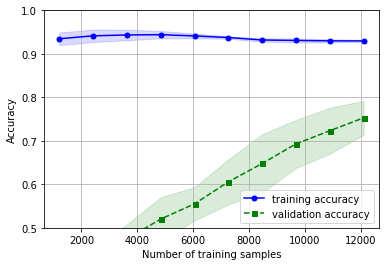

In [39]:
rf_test1 = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample",
                                  min_samples_split=25)
draw_learning_curve(rf_test1, X_scaled, y, 5)

# Feature selection via RandomForest + RFE

In [27]:
rf_rfe = RandomForestClassifier(n_estimators=100, random_state = 0)
rfe = RFE(rf_rfe, 200)
rfe_rf200 = rfe.fit(X_scaled_, y)

# summarize the selection of the attributes
print(rfe_rf200.support_)
print(rfe_rf200.ranking_)

X_rf_rfe_top200 = X_scaled_.loc[:, rfe_rf200.support_]

[ True  True  True  True  True  True  True  True  True  True  True False
  True False False False False  True False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [28]:
rfe = RFE(rf_rfe, 150)
rfe_rf150 = rfe.fit(X_rf_rfe_top200, y)

# summarize the selection of the attributes
print(rfe_rf150.support_)
print(rfe_rf150.ranking_)

X_rf_rfe_top150 = X_scaled_.loc[:, rfe_rf150.support_]

[ True  True False  True  True  True  True  True False  True  True  True
 False False False False  True  True  True False False False False False
 False False False False False False False False False False False False
 False  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False False  True  True  True False False False False
  True  True False  True False  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False Fa

In [29]:
rfe = RFE(rf_rfe, 100)
rfe_rf100 = rfe.fit(X_rf_rfe_top150, y)

# summarize the selection of the attributes
print(rfe_rf100.support_)
print(rfe_rf100.ranking_)

X_rf_rfe_top100 = X_scaled_.loc[:, rfe_rf100.support_]

[ True  True  True  True  True  True  True  True  True  True  True  True
 False False  True False  True  True False False False False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False  True  True  True  True  True  True  True False False  True  True
 False False False False False False False False False False False False
 False False False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  6 32  1  3  1  1 39 34 43 47  1  1 29
  1  1  1 

In [30]:
rfe = RFE(rf_rfe, 50)
rfe_rf50 = rfe.fit(X_rf_rfe_top100, y)

# summarize the selection of the attributes
print(rfe_rf50.support_)
print(rfe_rf50.ranking_)

X_rf_rfe_top50 = X_scaled_.loc[:, rfe_rf50.support_]

[ True  True False  True  True  True  True  True  True  True  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False  True
 False False  True  True False False False  True False  True False False
 False  True False  True  True  True False False False False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[ 1  1  3  1  1  1  1  1  1  1  1 32 33 12 13  1 34 30 42 40 23 39 46 38 48
 28 27 37 50 43 44 49 25 26 35 22 29 45 41 47 51 31 24 36  1 16  9  1 20  5
  1  1 17 15 21  1  8  1  6  4 10  1 19  1  1  1 11 18  7  2 14  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


# Feature selection via ExtraTreesClassifier + RFE

In [31]:
etc_rfe = ExtraTreesClassifier(n_estimators=100, random_state = 0)
rfe = RFE(etc_rfe, 200)
rfe_etc200 = rfe.fit(X_scaled_, y)

# summarize the selection of the attributes
print(rfe_etc200.support_)
print(rfe_etc200.ranking_)

X_etc_rfe_top200 = X_scaled_.loc[:, rfe_etc200.support_]

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False False  True  True False False False False  True False
 False False False False  True False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False  True  True False  True False  True
  True  True False  True False  True False  True False  True False  True
 False  True  True  True False  True False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False  True False False False False False False
 False False False False False False False False Fa

In [32]:
rfe = RFE(etc_rfe, 150)
rfe_etc150 = rfe.fit(X_etc_rfe_top200, y)

# summarize the selection of the attributes
print(rfe_etc150.support_)
print(rfe_etc150.ranking_)

X_etc_rfe_top150 = X_scaled_.loc[:, rfe_etc150.support_]

[ True  True False  True  True  True  True  True False  True  True  True
  True  True False  True False False  True  True False False False False
  True False  True  True  True  True False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False False  True  True  True  True False False False
 False False False  True False False  True False False  True False  True
  True  True  True False  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [33]:
rfe = RFE(etc_rfe, 100)
rfe_etc100 = rfe.fit(X_etc_rfe_top150, y)

# summarize the selection of the attributes
print(rfe_etc100.support_)
print(rfe_etc100.ranking_)

X_etc_rfe_top100 = X_scaled_.loc[:, rfe_etc100.support_]

[ True  True  True  True  True  True  True  True  True False  True  True
  True False  True  True False False  True False  True  True False False
 False False False  True  True False  True False False False False False
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False]
[ 1  1  1  1  1  1  1  1  1 12  1  1  1 23  1  1 32 29  1 39  1  1 14 49 43
 40 46  1 

In [34]:
rfe = RFE(etc_rfe, 50)
rfe_etc50 = rfe.fit(X_etc_rfe_top100, y)

# summarize the selection of the attributes
print(rfe_etc50.support_)
print(rfe_etc50.ranking_)

X_etc_rfe_top50 = X_scaled_.loc[:, rfe_etc50.support_]

[ True  True False  True  True  True  True  True  True  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True False False False False False  True False  True
 False False False  True False False False False False  True False  True
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False]
[ 1  1  5  1  1  1  1  1  1  1 39  1 37 28 40 51 49 42 18 45 44 47 27 33 38
 15 36 46 43 48 50 35 31 41 23 30 11  1 32  1 16  4 14  9 17  1 21  1 22  8
 24  1 25 10 13  7 20  1 19  1 26  1 29  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  3  1 12  6  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2 34]


# Feature selection via XGBClassifier + RFE

In [35]:
xgb_rfe = XGBClassifier(n_estimators=100, objective='multi:softmax')
rfe = RFE(xgb_rfe, 200)
rfe_xgb200 = rfe.fit(X_scaled_, y)

# summarize the selection of the attributes
print(rfe_xgb200.support_)
print(rfe_xgb200.ranking_)

X_xgb_rfe_top200 = X_scaled_.loc[:, rfe_xgb200.support_]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True False
 False False False False False False False False False False False  True
 False False False  True False False False  True False False False  True
 False False False  True False False  True  True False False False  True
 False False False False  True False False False  True False False False
  True False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False  True  True  True False  True False  True False False False False
 False  True  True  True  True  True  True  True  T

In [36]:
rfe = RFE(xgb_rfe, 150)
rfe_xgb150 = rfe.fit(X_xgb_rfe_top200, y)

# summarize the selection of the attributes
print(rfe_xgb150.support_)
print(rfe_xgb150.ranking_)

X_xgb_rfe_top150 = X_scaled_.loc[:, rfe_xgb150.support_]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True  True
  True  True False  True  True  True False  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True False False
 False  True  True  True False  True False  True False False  True False
 False False  True False False False  True False False  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False  True  True  True False False False False False
 False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True Fa

In [37]:
rfe = RFE(xgb_rfe, 100)
rfe_xgb100 = rfe.fit(X_xgb_rfe_top150, y)

# summarize the selection of the attributes
print(rfe_xgb100.support_)
print(rfe_xgb100.ranking_)

X_xgb_rfe_top100 = X_scaled_.loc[:, rfe_xgb100.support_]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  True False False  True False  True False
 False  True False False False  True  True False  True False False  True
 False False False  True False  True  True  True  True  True  True  True
  True False False False  True False False False  True  True  True  True
  True  True  True False  True False  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False False False False False
 False False False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 

In [38]:
rfe = RFE(xgb_rfe, 50)
rfe_xgb50 = rfe.fit(X_xgb_rfe_top100, y)

# summarize the selection of the attributes
print(rfe_xgb50.support_)
print(rfe_xgb50.ranking_)

X_xgb_rfe_top50 = X_scaled_.loc[:, rfe_xgb50.support_]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False False  True  True
  True  True False  True  True  True  True  True  True  True False False
  True False  True  True  True  True  True False False False  True  True
 False  True False False  True False False False False False False False
 False False  True False False False  True False  True False False False
 False False  True False False False False  True False False  True False
 False False  True False False  True False False False False False False
 False  True False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 37 21  1  1  1
  1 42  1  1  1  1  1  1  1 27 29  1 33  1  1  1  1  1  2 39 43  1  1 49  1
 26 28  1 31  8 19 20 22 36 38 40 41  1 24 25 35  1 34  1 32 23 18 30 14  1
 10 12 11 13  1 16 17  1 44 45 46  1 48 47  1 15  4  5  6  3  9  7  1 50 51]


In [39]:
filtered_rf = [X_rf_rfe_top200.columns.tolist(),
              X_rf_rfe_top150.columns,
              X_rf_rfe_top100.columns,
              X_rf_rfe_top50.columns]

In [40]:
filtered_etc = [X_etc_rfe_top200.columns.tolist(),
               X_etc_rfe_top150.columns,
               X_etc_rfe_top100.columns,
               X_etc_rfe_top50.columns]

In [41]:
filtered_xgb = [X_xgb_rfe_top200.columns.tolist(),
               X_xgb_rfe_top150.columns,
               X_xgb_rfe_top100.columns,
               X_xgb_rfe_top50.columns]

In [136]:
filtered_rf

[['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area1',
  'Wilderness_Area3',
  'Soil_Type4',
  'Soil_Type10',
  'Slope_log',
  'Slope_log_pdf_5',
  'Slope_log_cdf_5',
  'Wilderness_Area',
  'Slope_log_wild_cdf_51',
  'Slope_log_pdf_2',
  'Slope_log_cdf_2',
  'Slope_log_wild_pdf_21',
  'Slope_log_wild_cdf_21',
  'Slope_log_pdf_1',
  'Slope_log_cdf_1',
  'Slope_log_wild_pdf_11',
  'Slope_log_wild_cdf_11',
  'Slope_log_pdf_7',
  'Slope_log_cdf_7',
  'Slope_log_wild_pdf_71',
  'Slope_log_wild_cdf_71',
  'Slope_log_pdf_3',
  'Slope_log_cdf_3',
  'Slope_log_wild_pdf_31',
  'Slope_log_pdf_6',
  'Slope_log_cdf_6',
  'Slope_log_wild_pdf_61',
  'Slope_log_wild_cdf_61',
  'Slope_log_pdf_4',
  'Slope_log_wild_pdf_41',
  'Slope_log_wild_cdf_41',
  'Elevation_log',
  'Elevation_log_pdf_5',

In [129]:
filtered_etc

[['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area1',
  'Wilderness_Area3',
  'Wilderness_Area4',
  'Soil_Type3',
  'Soil_Type4',
  'Soil_Type10',
  'Soil_Type17',
  'Soil_Type22',
  'Slope_log_cdf_5',
  'Wilderness_Area',
  'Slope_log_wild_cdf_51',
  'Slope_log_cdf_2',
  'Slope_log_wild_pdf_21',
  'Slope_log_wild_cdf_21',
  'Slope_log_cdf_1',
  'Slope_log_wild_cdf_11',
  'Slope_log_cdf_7',
  'Slope_log_wild_cdf_71',
  'Slope_log_cdf_3',
  'Slope_log_wild_cdf_31',
  'Slope_log_pdf_6',
  'Slope_log_cdf_6',
  'Slope_log_wild_cdf_61',
  'Slope_log_cdf_4',
  'Slope_log_wild_cdf_41',
  'Elevation_log',
  'Elevation_log_pdf_5',
  'Elevation_log_cdf_5',
  'Elevation_log_wild_pdf_51',
  'Elevation_log_wild_cdf_51',
  'Elevation_log_pdf_2',
  'Elevation_log_cdf_2',
  'Elevation_log_w

In [138]:
filtered_xgb

[['Elevation',
  'Aspect',
  'Slope',
  'Horizontal_Distance_To_Hydrology',
  'Vertical_Distance_To_Hydrology',
  'Horizontal_Distance_To_Roadways',
  'Hillshade_9am',
  'Hillshade_Noon',
  'Hillshade_3pm',
  'Horizontal_Distance_To_Fire_Points',
  'Wilderness_Area1',
  'Wilderness_Area2',
  'Wilderness_Area3',
  'Wilderness_Area4',
  'Soil_Type1',
  'Soil_Type2',
  'Soil_Type3',
  'Soil_Type4',
  'Soil_Type5',
  'Soil_Type6',
  'Soil_Type8',
  'Soil_Type9',
  'Soil_Type10',
  'Soil_Type11',
  'Soil_Type12',
  'Soil_Type13',
  'Soil_Type14',
  'Soil_Type16',
  'Soil_Type17',
  'Soil_Type18',
  'Soil_Type19',
  'Soil_Type20',
  'Soil_Type21',
  'Soil_Type22',
  'Soil_Type23',
  'Soil_Type24',
  'Soil_Type25',
  'Soil_Type26',
  'Soil_Type27',
  'Soil_Type28',
  'Soil_Type29',
  'Soil_Type30',
  'Soil_Type31',
  'Soil_Type32',
  'Soil_Type33',
  'Soil_Type34',
  'Soil_Type37',
  'Soil_Type38',
  'Soil_Type39',
  'Soil_Type40',
  'Slope_log',
  'Slope_log_pdf_5',
  'Slope_log_cdf_5',
  'W

# High Bias (=underfit)
* training accuracy / vaildation accuracy 모두 낮다
* 추가 피처를 수집/생성 또는 정규화 수준을 감소시켜 모델 파라미터 수 증가

# High Variance (=overfit)
* training accuracy - validation accuracy간 차이가 크다
* training sample을 더 확보한다
* 모델의 복잡도를 낮춘다
  * Feature Selection
  * 차원축소를 이용한 데이터 압축
  * 훈련 데이터에 noise가 많거나 모델이 이미 최적에 가까운 경우 도움X

In [152]:
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', SVC(random_state=0))])

param_range = [0.0001, 0.001, 0.01, 1.0, 10.0]
param_grid = [{'clf__C': param_range,
              'clf__kernel':['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs = gs.fit(X_scaled_[filtered_etc[0]], y)

KeyboardInterrupt: 

In [ ]:
print(gs.bset_score_)
print(gs.best_params_)

In [176]:
# Logistic Regression
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', LogisticRegression(random_state=0))])

param_range = [0.0001, 0.001, 0.01, 0.1]
param_grid = [{'clf__C': param_range,
              'clf__penalty':['l1'],
              'clf__solver': ['saga'],
              'clf__multi_class':['ovr','multinomial']},
              {'clf__C' : param_range,
               'clf__penalty':['l2'],
               'clf__solver': ['sag', 'newton-cg', 'lbfgs'],
               'clf__multi_class' : ['ovr', 'multinomial']}]

gs2 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs2 = gs2.fit(X_scaled_bestset, y)

In [177]:
print(gs2.best_score_)
print(gs2.best_params_)
gs2.cv_results_

0.673677248677
{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__multi_class': 'multinomial', 'clf__solver': 'lbfgs'}


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\

{'mean_fit_time': array([  0.15420446,   0.17035296,   6.69931905,   4.71894948,
         10.03318193,   5.14693732,  11.2702719 ,   6.0372551 ,
          1.16720414,   1.20881467,   0.22479753,   0.366324  ,
          0.72888825,   0.28375447,   3.11277814,   1.48941092,
          0.34281166,   1.60406575,   1.08277967,   0.52920709,
          7.09512019,   1.75571895,   0.59057043,   2.61309915,
          1.60246146,   0.98817196,   7.70799835,   2.68714607,
          1.54450738,   2.78806448,   3.419594  ,   0.98486905]),
 'mean_score_time': array([ 0.0178478 ,  0.00075202,  0.00145364,  0.00110283,  0.00095251,
         0.00220599,  0.00175464,  0.00090246,  0.00120308,  0.00120323,
         0.00105288,  0.00411096,  0.00135357,  0.00205541,  0.00195494,
         0.00105281,  0.00100257,  0.00080214,  0.00130332,  0.00150404,
         0.00090227,  0.00095277,  0.0009023 ,  0.00100269,  0.001454  ,
         0.00120299,  0.00095251,  0.00095272,  0.0010529 ,  0.00090232,
         0.0

In [168]:
logreg = LogisticRegression(C=0.0001, penalty='l2', random_state=0)
logreg_bestfit = logreg.fit(X_scaled_bestset, y)
logreg_bestfit.score(X_scaled_bestset, y)

0.6153439153439153

# Chosen Logreg spec
* 'C': 0.1, 
* 'penalty': 'l2', 
* 'multi_class': 'multinomial', 
* 'solver': 'lbfgs'}

In [179]:
#{'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__multi_class': 'multinomial', 'clf__solver': 'lbfgs'}
logreg2 = LogisticRegression(C=0.01, penalty='l2', multi_class='multinomial', solver='lbfgs', random_state=0)
logreg2_bestfit = logreg2.fit(X_scaled_bestset, y)
logreg2_bestfit.score(X_scaled_bestset, y)

0.70171957671957674

In [42]:
# KNeighbors
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'clf__algorithm': ['auto', 'ball_tree', 'kd_tree'],
              'clf__weights':['uniform', 'distance'],
              'clf__metric': ['minkowski'],
              'clf__p' : [1, 2]}]

gs3 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs3 = gs3.fit(X_scaled_bestset, y)

In [43]:
print(gs3.best_score_)
print(gs3.best_params_)

0.753108465608
{'clf__algorithm': 'auto', 'clf__metric': 'minkowski', 'clf__weights': 'distance', 'clf__p': 1}


In [187]:
gs3.cv_results_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\

{'mean_fit_time': array([ 0.17099247,  0.17265916,  0.17767255,  0.17717121]),
 'mean_score_time': array([ 2.33897467,  2.40800369,  1.93013318,  1.87804472]),
 'mean_test_score': array([ 0.73174603,  0.75310847,  0.70687831,  0.73194444]),
 'mean_train_score': array([ 0.87909318,  1.        ,  0.85731922,  1.        ]),
 'param_clf__algorithm': masked_array(data = ['auto' 'auto' 'auto' 'auto'],
              mask = [False False False False],
        fill_value = ?),
 'param_clf__metric': masked_array(data = ['minkowski' 'minkowski' 'minkowski' 'minkowski'],
              mask = [False False False False],
        fill_value = ?),
 'param_clf__p': masked_array(data = [1 1 2 2],
              mask = [False False False False],
        fill_value = ?),
 'param_clf__weights': masked_array(data = ['uniform' 'distance' 'uniform' 'distance'],
              mask = [False False False False],
        fill_value = ?),
 'params': [{'clf__algorithm': 'auto',
   'clf__metric': 'minkowski',
   'clf__p

# Chosen 

In [184]:
kn = KNeighborsClassifier(algorithm='auto', metric='minkowski', p=1, weights='distance')
kn_fit = kn.fit(X_scaled_bestset, y)
kn_fit.score(X_scaled_bestset, y)

1.0

In [44]:
# ExtraClassifier
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', ExtraTreesClassifier(random_state=0))])

param_grid = [{'clf__n_estimators': [30, 50, 100, 150],
              'clf__criterion':['gini', 'entropy'],
              'clf__max_features': [0.1, 0.3, 0.5, 0.7, 'sqrt', 'log2'],
              'clf__max_depth' : [50, 100, 200, 300, None],
              'clf__min_impurity_decrease' : [0.05, 0.1, 0.15, 0.2, 0],
              'clf__class_weight' : ["balanced", "balanced_subsample", None]}]

gs4 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs4 = gs4.fit(X_scaled_bestset, y)

In [45]:
print(gs4.best_score_)
print(gs4.best_params_)

0.818650793651
{'clf__max_depth': 50, 'clf__max_features': 0.3, 'clf__criterion': 'gini', 'clf__class_weight': 'balanced', 'clf__min_impurity_decrease': 0, 'clf__n_estimators': 150}


In [74]:
gs4.cv_results_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Administrator\Anaconda3\

{'mean_fit_time': array([ 0.08777955,  0.15150282,  0.29232743, ...,  0.89272408,
         1.80018723,  2.6470896 ]),
 'mean_score_time': array([ 0.00458148,  0.00877361,  0.0158422 , ...,  0.02441497,
         0.04647372,  0.06467214]),
 'mean_test_score': array([ 0.44047619,  0.44431217,  0.44609788, ...,  0.81071429,
         0.81309524,  0.81388889]),
 'mean_train_score': array([ 0.44205614,  0.44769253,  0.44828042, ...,  1.        ,
         1.        ,  1.        ]),
 'param_clf__class_weight': masked_array(data = ['balanced' 'balanced' 'balanced' ..., None None None],
              mask = [False False False ..., False False False],
        fill_value = ?),
 'param_clf__criterion': masked_array(data = ['gini' 'gini' 'gini' ..., 'entropy' 'entropy' 'entropy'],
              mask = [False False False ..., False False False],
        fill_value = ?),
 'param_clf__max_depth': masked_array(data = [50 50 50 ..., None None None],
              mask = [False False False ..., False False

In [20]:
etc_grid = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)

In [19]:
etc_grid = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
#etc_fit = etc_grid.fit(X_scaled_bestset, y)
make_submission_csv(etc_grid, X_scaled_bestset, y, X_scaled_test[X_scaled_bestset.columns], "etc_bestset_grid1.csv")

NameError: name 'X_scaled_bestset' is not defined

In [60]:
do_kfold_cv(X_scaled_bestset, y, etc_grid, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.78174603  0.83333333  0.82804233  0.76653439  0.78571429  0.75793651
  0.80687831  0.82936508  0.90277778  0.86904762]
0.816137566138


In [70]:
etc_bestset_grid1_pred = etc_grid.fit(X_scaled_bestset, y).predict(X_scaled_bestset)

In [ ]:
for i in range(4):
    print('filtered-rf', 200-50*i)
    do_kfold_cv(X_scaled_[filtered_rf[i]], y, etc_grid, 10)
    print('-')
    print('filtered-etc', 200-50*i)
    do_kfold_cv(X_scaled_[filtered_etc[i]], y, etc_grid, 10)
    print('-')
    print('filtered-xgb', 200-50*i)
    do_kfold_cv(X_scaled_[filtered_xgb[i]], y, etc_grid, 10)
    print('-')
    

In [75]:
filtered_tot = filtered_rf + filtered_etc + filtered_xgb

# GridSearch for ExtraTreesClassifier
### by multiple Featuresets

In [93]:
rf200_cvres = pd.Series([31, 25, 13, 19, 55, 61, 85, 91, 31, 25, 13, 19, 55, 61, 85, 91, 37,
        43,  1,  1, 67, 49, 79, 73, 37, 43,  1,  1, 67, 49, 79, 73, 31, 25,
        13, 19, 55, 61, 85, 91, 31, 25, 13, 19, 55, 61, 85, 91, 37, 43,  1,
         1, 67, 49, 79, 73, 37, 43,  1,  1, 67, 49, 79, 73, 31, 25, 13, 19,
        55, 61, 85, 91, 31, 25, 13, 19, 55, 61, 85, 91, 37, 43,  1,  1, 67,
        49, 79, 73, 37, 43,  1,  1, 67, 49, 79, 73])

rank1 = rf200_cvres[rf200_cvres==1].index

In [117]:
etc_grid2 = ExtraTreesClassifier(max_depth=35, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid2, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.78240741  0.83597884  0.82804233  0.76455026  0.78571429  0.76984127
  0.80224868  0.83399471  0.89880952  0.8723545 ]
0.817394179894


In [118]:
etc_grid3 = ExtraTreesClassifier(max_depth=25, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid3, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.78439153  0.83134921  0.82738095  0.76256614  0.78505291  0.76719577
  0.80687831  0.83730159  0.89814815  0.86970899]
0.816997354497


In [120]:
etc_grid4 = ExtraTreesClassifier(max_depth=20, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid4, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.77314815  0.83399471  0.82142857  0.76058201  0.78505291  0.76190476
  0.80489418  0.83730159  0.89748677  0.86309524]
0.813888888889


In [123]:
etc_grid5 = ExtraTreesClassifier(max_depth=18, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid5, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.7526455   0.82936508  0.81812169  0.75925926  0.78769841  0.75595238
  0.80291005  0.83002646  0.88955026  0.85846561]
0.808399470899


In [125]:
etc_grid6 = ExtraTreesClassifier(max_depth=18, max_features=0.5, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid6, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.75132275  0.83068783  0.81812169  0.75925926  0.77910053  0.76190476
  0.79960317  0.83134921  0.89087302  0.85119048]
0.807341269841


In [127]:
etc_grid6_1 = ExtraTreesClassifier(max_depth=18, max_features=0.3, criterion='entropy',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid6_1, 10) # kaggle test acc. 0.80137

K-Fold number of splits: 10
[ 0.76322751  0.83068783  0.81415344  0.75727513  0.78902116  0.74867725
  0.80489418  0.83465608  0.89219577  0.86111111]
0.80958994709


In [154]:
micro_etc_tuned = []

for i in [15, 18]:
    for j in [0.2]:
        for k in ['entropy', 'gini']:
            
            etc_test_ = ExtraTreesClassifier(max_depth=i, max_features=j, criterion=k,\
                               class_weight='balanced', n_estimators = 150)
            
            print(i,j,k)
            valid_acc = do_kfold_cv(X_scaled_bestset, y, etc_test_, 10)
            train_acc = etc_test_.fit(X_scaled_bestset, y).score(X_scaled_bestset, y)
            
            micro_etc_tuned.append(((i,j,k), valid_acc, train_acc, valid_acc - train_acc))

15 0.2 entropy
K-Fold number of splits: 10
[ 0.72949735  0.82208995  0.80489418  0.74404762  0.78240741  0.75
  0.79761905  0.82539683  0.87566138  0.83730159]
0.796891534392
15 0.2 gini
K-Fold number of splits: 10
[ 0.72222222  0.81944444  0.80026455  0.73677249  0.77116402  0.75529101
  0.79232804  0.8260582   0.87103175  0.83465608]
0.792923280423
18 0.2 entropy
K-Fold number of splits: 10
[ 0.75198413  0.83002646  0.80952381  0.75595238  0.78637566  0.75727513
  0.81216931  0.83068783  0.87962963  0.85714286]
0.807076719577
18 0.2 gini
K-Fold number of splits: 10
[ 0.75727513  0.83267196  0.81944444  0.75132275  0.78306878  0.75595238
  0.80820106  0.83465608  0.88492063  0.85780423]
0.808531746032


In [155]:
micro_etc_tuned.sort(key=lambda x: -x[3])

In [156]:
micro_etc_tuned

[((15, 0.2, 'gini'),
  0.79292328042328042,
  0.97215608465608461,
  -0.17923280423280419),
 ((15, 0.2, 'entropy'),
  0.79689153439153437,
  0.97863756613756614,
  -0.18174603174603177),
 ((18, 0.2, 'gini'),
  0.80853174603174605,
  0.99570105820105825,
  -0.18716931216931221),
 ((18, 0.2, 'entropy'),
  0.80707671957671967,
  0.99742063492063493,
  -0.19034391534391526)]

In [157]:
micro_etc_tuned2 = []

for i in [16, 17]:
    for j in [0.18, 0.2]:
        for k in ['gini', 'entropy']:
            
            etc_test_ = ExtraTreesClassifier(max_depth=i, max_features=j, criterion=k,\
                               class_weight='balanced', n_estimators = 150)
            
            print(i,j,k)
            valid_acc = do_kfold_cv(X_scaled_bestset, y, etc_test_, 10)
            train_acc = etc_test_.fit(X_scaled_bestset, y).score(X_scaled_bestset, y)
            
            micro_etc_tuned2.append(((i,j,k), valid_acc, train_acc, valid_acc - train_acc))

16 0.18 gini
K-Fold number of splits: 10
[ 0.7228836   0.82275132  0.8042328   0.74074074  0.77314815  0.75859788
  0.7989418   0.83134921  0.87367725  0.83928571]
0.796560846561
16 0.18 entropy
K-Fold number of splits: 10
[ 0.73941799  0.83068783  0.80092593  0.74470899  0.78373016  0.75595238
  0.80357143  0.82142857  0.88029101  0.84259259]
0.800330687831
16 0.2 gini
K-Fold number of splits: 10
[ 0.73346561  0.82473545  0.80753968  0.74867725  0.78108466  0.75330688
  0.79695767  0.83399471  0.87367725  0.84259259]
0.799603174603
16 0.2 entropy
K-Fold number of splits: 10
[ 0.74140212  0.82804233  0.80224868  0.75066138  0.78439153  0.75396825
  0.80092593  0.8260582   0.88227513  0.84986772]
0.801984126984
17 0.18 gini
K-Fold number of splits: 10
[ 0.74206349  0.83134921  0.81481481  0.74603175  0.7797619   0.76190476
  0.80357143  0.83068783  0.88359788  0.84589947]
0.803968253968
17 0.18 entropy
K-Fold number of splits: 10
[ 0.74140212  0.8234127   0.81150794  0.75925926  0.78042

In [158]:
sorted(micro_etc_tuned2, key=lambda x: -x[3])

[((16, 0.18, 'gini'),
  0.79656084656084658,
  0.98141534391534391,
  -0.18485449735449733),
 ((17, 0.2, 'gini'),
  0.80522486772486768,
  0.99014550264550261,
  -0.18492063492063493),
 ((16, 0.2, 'gini'),
  0.79960317460317465,
  0.98465608465608467,
  -0.18505291005291002),
 ((16, 0.18, 'entropy'),
  0.80033068783068784,
  0.98604497354497356,
  -0.18571428571428572),
 ((17, 0.18, 'gini'),
  0.803968253968254,
  0.99014550264550261,
  -0.18617724867724861),
 ((16, 0.2, 'entropy'),
  0.80198412698412702,
  0.98968253968253972,
  -0.1876984126984127),
 ((17, 0.2, 'entropy'),
  0.80641534391534397,
  0.99484126984126986,
  -0.18842592592592589),
 ((17, 0.18, 'entropy'),
  0.80482804232804239,
  0.99470899470899465,
  -0.18988095238095226)]

In [16]:
etc_grid_0 = ExtraTreesClassifier(max_depth=15, max_features=0.2, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)

#do_kfold_cv(X_scaled_bestset, y, etc_grid_0, 10) # 0.77315

etc_grid_0_fit = etc_grid_0.fit(X_scaled_bestset, y)


In [160]:
etc_grid_1 = ExtraTreesClassifier(max_depth=18, max_features=0.2, criterion='gini',\
                               class_weight='balanced', n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid_1, 10) # 0.77315

K-Fold number of splits: 10
[ 0.7526455   0.83333333  0.81944444  0.75396825  0.78306878  0.76521164
  0.80687831  0.83465608  0.88624339  0.85119048]
0.808664021164


0.80866402116402125

In [168]:
etc_grid_2 = ExtraTreesClassifier(max_depth=35, max_features=0.2, criterion='gini',\
                               n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid_2, 10)

K-Fold number of splits: 10
[ 0.78373016  0.83201058  0.8260582   0.76455026  0.78703704  0.75727513
  0.81613757  0.83730159  0.90343915  0.86772487]
0.817526455026


0.81752645502645505

In [172]:
etc_grid_3 = ExtraTreesClassifier(max_depth=35, max_features=0.5, criterion='gini',\
                               n_estimators = 150)
do_kfold_cv(X_scaled_bestset, y, etc_grid_3, 10)

K-Fold number of splits: 10
[ 0.77777778  0.83333333  0.8260582   0.76785714  0.78439153  0.76388889
  0.80092593  0.8287037   0.90013228  0.86177249]
0.814484126984


0.81448412698412709

In [167]:
make_submission_csv(etc_grid_1, X_scaled_bestset, y, X_scaled_test[X_scaled_bestset.columns], "etc_bestset_grid2.csv")

In [169]:
make_submission_csv(etc_grid_2, X_scaled_bestset, y, X_scaled_test[X_scaled_bestset.columns], "etc_bestset_grid3.csv")

In [173]:
# KFold 적용이 이상했으므로 XGBoost도 1회 테스트.
# 이전보다 상당히 높은 값이 나온다면(0.8+) 그리드서치를 진행.

xgb_test = XGBClassifier(objective='multi:softmax', random_state=0)
do_kfold_cv(X_scaled_bestset, y, xgb_test, 10)

K-Fold number of splits: 10
[ 0.63756614  0.74338624  0.68386243  0.65873016  0.69246032  0.72883598
  0.69907407  0.75066138  0.75529101  0.75661376]
0.710648148148


0.71064814814814814

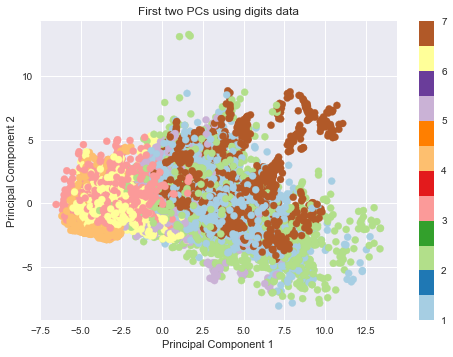

In [243]:
svd = TruncatedSVD(n_components=2)
X_selected_2d = svd.fit_transform(X_scaled_bestset)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

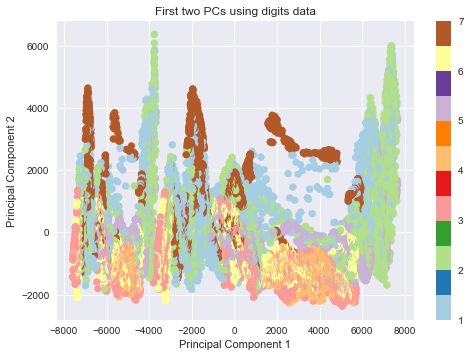

In [28]:
pca = PCA(n_components=2)
X_selected_2d = pca.fit_transform(train_df)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

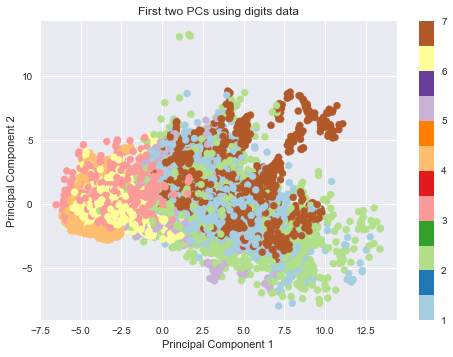

In [241]:
pca = PCA(n_components=2)
X_selected_2d = pca.fit_transform(X_scaled_bestset)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

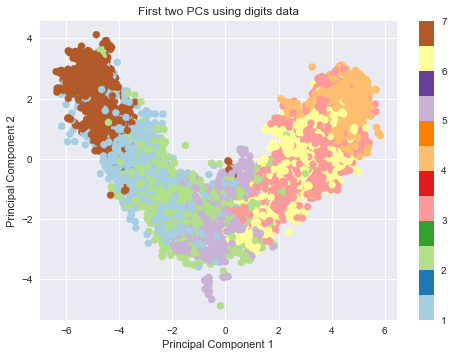

In [239]:
lda = LDA(n_components=2)
X_selected_2d = lda.fit_transform(X_scaled_bestset, y)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

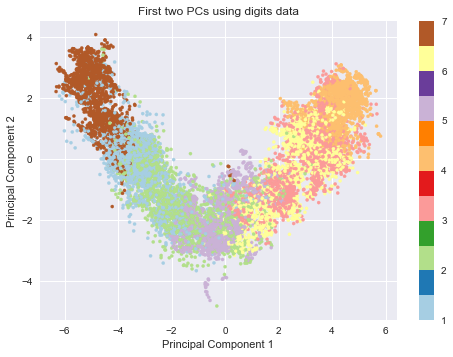

In [248]:
lda = LDA(n_components=2, solver='svd', tol = 0.17)
X_selected_2d = lda.fit_transform(X_scaled_bestset, y)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=10, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

# Experiment 1
# Class Weight

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [24]:
def draw_confmat(confmat):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

In [25]:
etc_grid = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150, random_state=0)

wrongs_tn = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}
wrongs_fp = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}
confmat_summed = []
wrongs_indices = {}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
                            X_scaled_bestset, y, test_size=0.1, random_state=i)
    
    etc_grid_fit = etc_grid.fit(X_train, y_train)
    y_hat = etc_grid_fit.predict(X_test)
    
    compare = (y_test == y_hat)

    wrongs_idx = compare[compare==False].index
    wrongs = y_test[wrongs_idx].value_counts()
    
    for i in range(1, 8):
        wrongs_tn[str(i)] += wrongs[i]
        
    for widx in wrongs_idx:
        if widx in wrongs_indices:
            wrongs_indices[widx] += 1
        else:
            wrongs_indices[widx] = 1
    
    confmat = confusion_matrix(y_true=y_test, y_pred=y_hat)
    
    if type(confmat_summed) != list:
        confmat_summed = np.add(confmat, confmat_summed)
    else:
        confmat_summed = confmat
    

In [146]:
len(wrongs_indices)

1071

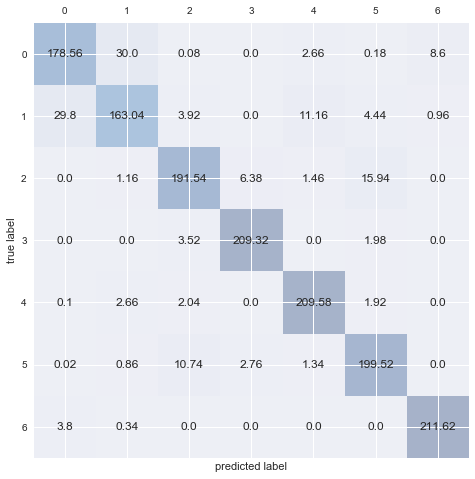

In [81]:
draw_confmat(confmat_summed/50)

In [96]:
confmat_avg = confmat_summed/50

In [104]:
# num of true negative
tn = confmat_avg.sum(axis=1) - confmat_summed.diagonal()/50

tn_reg = tn / np.min(tn)
tn_reg

array([ 10.30845771,  12.65671642,   6.17412935,   1.3880597 ,
         1.65174129,   3.95024876,   1.        ])

In [105]:
# num of false positive
fp = confmat_avg.sum(axis=0) - confmat_summed.diagonal()/50
fp_reg = fp / np.min(fp)
fp_reg

array([ 3.75764192,  3.78165939,  2.27729258,  1.        ,  1.79475983,
        2.62227074,  1.06113537])

In [117]:
test_weight_1 = {i+1 : np.log(tn)+1 for i, tn in enumerate(tn_reg)}
test_weight_2 = {i+1 : np.log(fp)+1 for i, fp in enumerate(fp_reg)}

In [118]:
test_weight_1

{1: 3.3329646953202952,
 2: 3.5381880164009352,
 3: 2.8203678771455287,
 4: 1.3279068737622897,
 5: 1.5018300608574082,
 6: 2.3737785531880569,
 7: 1.0}

In [121]:
test_weight_2

{1: 2.3237916120973545,
 2: 2.330162905008196,
 3: 1.8229872708865873,
 4: 1.0,
 5: 1.5848712109419951,
 6: 1.9640406379657995,
 7: 1.0593394397863092}

In [130]:
test_weight_3 = {v1[0] : v1[1]*v2[1] for v1, v2  in zip(list(test_weight_1.items()), list(test_weight_2.items()))}

In [131]:
test_weight_3

{1: 7.7451154024019164,
 2: 8.2445544667619899,
 3: 5.1414947392537247,
 4: 1.3279068737622897,
 5: 2.3802072271801706,
 6: 4.6621975439930035,
 7: 1.0593394397863092}

In [119]:
etc_addweight = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               n_estimators = 150, class_weight=test_weight_1)

do_kfold_cv(X_scaled_bestset, y, etc_addweight, 10)

K-Fold number of splits: 10
[ 0.7744709   0.83002646  0.83134921  0.75859788  0.77843915  0.76521164
  0.80555556  0.83333333  0.90079365  0.87037037]
0.814814814815


0.81481481481481488

In [120]:
etc_addweight2 = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               n_estimators = 150, class_weight=test_weight_2)

do_kfold_cv(X_scaled_bestset, y, etc_addweight2, 10)

K-Fold number of splits: 10
[ 0.77579365  0.8287037   0.82407407  0.76851852  0.78902116  0.76521164
  0.8015873   0.82804233  0.90013228  0.86970899]
0.815079365079


0.81507936507936518

In [133]:
etc_addweight3 = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               n_estimators = 150, class_weight=test_weight_3)

do_kfold_cv(X_scaled_bestset, y, etc_addweight3, 10)

K-Fold number of splits: 10
[ 0.78240741  0.83597884  0.81812169  0.76322751  0.78439153  0.76653439
  0.80753968  0.83068783  0.89814815  0.86772487]
0.815476190476


0.81547619047619047

In [134]:
make_submission_csv(etc_addweight3, X_scaled_bestset, y, X_scaled_test[X_scaled_bestset.columns], 'etc_addweight_3.csv')

# Experiment 2
# Create VotingClassifier

In [ ]:
pipe_svc = Pipeline([('dim', PCA()),
                     ('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'dim__n_components' : range(2, 50),
              'clf__algorithm': ['auto'],
              'clf__weights':['uniform', 'distance'],
              'clf__metric': ['minkowski'],
              'clf__p' : [1, 2]}]

gs_test_kn2 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs_test_kn2 = gs_test_kn2.fit(X_scaled_bestset, y)

print(gs_test_kn2.best_score_)
print(gs_test_kn2.best_params_)
print('#####')

In [ ]:
# KNeighbors
# 그리드 검색을 통한 하이퍼파라미터 튜닝

#kn_gridsearch_by_dim = {}


pipe_svc = Pipeline([('dim', LDA()),
                     ('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'dim__n_components' : range(2, 50),
              'clf__algorithm': ['auto'],
              'clf__weights':['uniform', 'distance'],
              'clf__metric': ['minkowski'],
              'clf__p' : [1, 2]}]

gs_test_kn1 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs_test_kn1 = gs_test_kn1.fit(X_scaled_bestset, y)

print(gs_test_kn1.best_score_)
print(gs_test_kn1.best_params_)
print('#####')

In [ ]:
# Logistic Regression
# 그리드 검색을 통한 하이퍼파라미터 튜닝


pipe_svc = Pipeline([('dim', LDA()),\
                    ('clf', LogisticRegression(random_state=0))])

param_range = [0.001, 0.01, 0.1]
param_grid = [{'dim__n_components': np.arange(2,50),
              'clf__C': param_range,
              'clf__penalty':['l1', 'l2']}]

gs_test_lr1 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs_test_lr1 = gs_test_lr1.fit(X_scaled_bestset, y)

print(gs_test_lr1.best_score_)
print(gs_test_lr1.best_params_)
print('#####')

In [ ]:
clf1 = LogisticRegression(penalty='l2', C=0.01, random_state=0)
clf2 = ExtraTreesClassifier(max_depth=30, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

#rf_balance = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced_subsample")
#etc_gini = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='gini', class_weight="balanced_subsample")
#etc_ent = ExtraTreesClassifier(n_estimators=100, random_state=0, criterion='entropy', class_weight="balanced_subsample")

clf_labels = ['logreg','dectree', 'kn']
print('10-fold cross validation:\n')

# 다수결 규칙 투표를 위한 개별 분류기의 결합

vc_ = VotingClassifier(estimators=[('lr',clf1),
                                      ('dt', clf2),
                                      ('kn', clf3)], voting='')
clf_labels += ['Majority Voting']
all_clf = [clf1, clf2, clf3, vc_]

for i in range(4):
    for clf, label in zip(all_clf, clf_labels):
        scores = cross_val_score(estimator=clf,
                                 X = X_scaled_[filtered_etc[i]],
                                 y = y,
                                 cv = 10,
                                 scoring = 'accuracy')

        print('ACCURACY : %0.3f (+/- %0.3f) [%s]' % (scores.mean(), scores.std(), label))

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1,X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arrange(x1_min, x1_max, resolution),
                          np.arrange(x2_min, x2_max, resoultion))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

In [ ]:
'''// X_scaled_를 일단 2차원 변환하여 그림 그려보기!'''

from sklearn.lda import LDA

lda = LDA(n_components=2)
X_scaled_lda = lda.fit_transform(X_scaled_, y)

lr = LogisticRegression()
lr = lr.fit(X_scaled_lda, y)
plt_decision_regions(X_scaled_lda, y, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# 그리드 검색을 통한 하이퍼파라미터 튜닝

pipe_svc = Pipeline([('clf', LogisticRegression(random_state=0))])

param_range = [0.0001, 0.001, 0.01, 0.1]
param_grid = [{'clf__C': param_range,
              'clf__penalty':['l1'],
              'clf__solver': ['saga'],
              'clf__multi_class':['ovr','multinomial']},
              {'clf__C' : param_range,
               'clf__penalty':['l2'],
               'clf__solver': ['sag', 'newton-cg', 'lbfgs'],
               'clf__multi_class' : ['ovr', 'multinomial']}]

gs2 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs2 = gs2.fit(X_scaled_bestset, y)

# best model

In [40]:
etc_grid = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',
                               class_weight='balanced', n_estimators = 150, random_state=0)

In [ ]:
do_kfold_cv(X_scaled_, y, etc_grid, 10)

In [ ]:
do_kfold_cv(X_scaled_bestset, y, etc_grid, 10)

# Experiment: Class Weight

In [ ]:
confmat_summed = []
wrongs_indices = {}

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
                            X_scaled_bestset, y, test_size=0.1, random_state=i)
    
    etc_grid_fit = etc_grid.fit(X_train, y_train)
    y_hat = etc_grid_fit.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_hat)
    
    compare = (y_test == y_hat)
    wrongs_idx = compare[compare==False].index
    
    for widx in wrongs_idx:
        widx_ = int(widx)
        
        if widx_ in wrongs_indices:
            wrongs_indices[widx_] += 1
        else:
            wrongs_indices[widx_] = 1
    
    if type(confmat_summed) != list:
        confmat_summed = np.add(confmat, confmat_summed)
    else:
        confmat_summed = confmat

In [ ]:
X_best_wrongs = X_scaled_bestset.iloc[list(wrongs_indices.keys())]
notwrong_indices = [x for x in list(X_scaled_bestset.index) if x not in list(wrongs_indices.keys())]
X_best_notwrong = X_scaled_bestset.iloc[notwrong_indices]

In [ ]:
y.iloc[list(wrongs_indices.keys())].value_counts()

In [ ]:
draw_confmat(confmat_summed)

In [ ]:
confmat_avg = confmat_summed/50

tn = confmat_avg.sum(axis=1) - confmat_summed.diagonal()/50
tn_reg = tn / np.min(tn)

fp = confmat_avg.sum(axis=0) - confmat_summed.diagonal()/50
fp_reg = fp / np.min(fp)

In [ ]:
test_weight_1 = {i+1 : np.log(tn)+1 for i, tn in enumerate(tn_reg)}
test_weight_2 = {i+1 : np.log(fp)+1 for i, fp in enumerate(fp_reg)}
test_weight_3 = {v1[0] : v1[1]*v2[1] for v1, v2  \
                 in zip(list(test_weight_1.items()), \
                        list(test_weight_2.items()))}

In [ ]:
test_weight_1

In [ ]:
test_weight_2

In [ ]:
test_weight_3

In [ ]:
pca = PCA(n_components=2)
X_selected_2d = pca.fit_transform(train_df)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=50, cmap=plt.cm.Paired)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

In [ ]:
etc_grid.fit(X_selected_2d_, y)

In [ ]:
plot_decision_regions(X_selected_2d_, y, etc_grid)

In [ ]:
# test weight dictionary in LDA 2d

lda = LDA(n_components=2)
X_selected_2d_ = lda.fit_transform(X_scaled_, y)

plt.scatter(X_selected_2d_[:,0], X_selected_2d_[:,1], c=y, s=10, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

In [ ]:
etc_grid.fit(X_selected_2d_, y)

In [ ]:
do_kfold_cv(train_df.drop(['Cover_Type'],1), y, etc_grid, 10)

In [ ]:
plot_decision_regions(X_selected_2d_, y, etc_grid)

# Custom Voting Classifier

In [ ]:
# test weight dictionary in LDA 2d

lda = LDA(n_components=2)
X_selected_2d = lda.fit_transform(X_scaled_bestset, y)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y, s=10, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

In [ ]:
etc_grid.fit(X_selected_2d, y)

In [ ]:
plot_decision_regions(X_selected_2d, y, etc_grid)

In [ ]:
logreg2 = LogisticRegression(C=0.1, penalty='l1', solver='saga', multi_class='multinomial', class_weight=test_weight_1).fit(X_scaled_bestset, y)
print(logreg2.score(X_scaled_bestset, y))

In [ ]:
logreg2_pred = logreg2.predict(X_dim6)
confmat = confusion_matrix(y_true=y, y_pred=logreg2_pred)

draw_confmat(confmat)

In [ ]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(
                            X_scaled_bestset, y, test_size=0.3, random_state=0)

In [ ]:
logreg_train1 = LogisticRegression(C=0.1, penalty='l1', solver='saga',\
                                          multi_class='multinomial', \
                                          class_weight="balanced", tol=0.01)\
                                        .fit(X_train1, y_train1)

train1_pred = pd.Series(logreg_train1.predict(X_train1), index=y_train1.index)
draw_confmat(confusion_matrix(y_train1, train1_pred))

print(logreg_train1.score(X_train1, y_train1))

In [ ]:
do_kfold_cv(X_train1, y_train1, logreg_train1, 10)

In [ ]:
wrong_index = (y_train1 == train1_pred)[(y_train1 == train1_pred) == False].index

In [ ]:
y_train1[wrong_index].value_counts()

In [ ]:
tn = confmat.sum(axis=1) - confmat.diagonal()
tn_reg = tn / np.min(tn)

fp = confmat.sum(axis=0) - confmat.diagonal()
fp_reg = fp / np.min(fp)

test_weight_1_t1 = {i+1 : np.log(tn)+1 for i, tn in enumerate(tn_reg)}
test_weight_2_t1 = {i+1 : np.log(fp)+1 for i, fp in enumerate(fp_reg)}
test_weight_3_t1 = {v1[0] : v1[1]*v2[1] for v1, v2  in zip(list(test_weight_1.items()), list(test_weight_2.items()))}

In [ ]:
X_train1_wrong1, X_train1_wrong2, y_train1_wrong1, y_train1_wrong2 = train_test_split(
                            X_train1.loc[wrong_index], y_train1[wrong_index], \
                            test_size=0.5, random_state=0)

### X_train2 + X_train1_wrong1
두번째 모델의 학습에 사용한다.
* 4536 samples (X_train2)
* 1525 samples (X_train1_wrong1)

In [ ]:
# 
X_train2_comb = pd.concat([X_train2, X_train1_wrong1], axis=0)
y_train2_comb = pd.concat([y_train2, y_train1_wrong1], axis=0)

In [ ]:
test_knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
test_fit_knn = test_knn.fit(X_train2_comb, y_train2_comb)
test_fit_knn.score(X_train2_comb, y_train2_comb)

In [ ]:
# KNeighbors
# 그리드 검색을 통한 하이퍼파라미터 튜닝

#kn_gridsearch_by_dim = {}

pipe_svc = Pipeline([('clf', KNeighborsClassifier(n_neighbors=7))])

param_grid = [{'clf__algorithm': ['auto'],
              'clf__weights':['uniform', 'distance'],
              'clf__p' : [1, 2]}]

gs_test_kn1 = GridSearchCV(estimator=pipe_svc,
                 param_grid = param_grid,
                  scoring='accuracy',
                 cv=10, n_jobs=-1)

gs_test_kn1 = gs_test_kn1.fit(X_train2_comb, y_train2_comb)

print(gs_test_kn1.best_score_)
print(gs_test_kn1.best_params_)
print('#####')

In [ ]:
do_kfold_cv(X_scaled_bestset, y, test_fit_knn, 5)

In [ ]:
knn_pred = test_fit_knn.predict(X_train2_comb)
confmat = confusion_matrix(y_true=y_train2_comb, y_pred=knn_pred)
draw_confmat(confmat)

In [ ]:
lda = LDA(n_components=2)
X_train2_2d = lda.fit_transform(X_train2_comb, y_train2_comb)

In [ ]:
test_knn2 = KNeighborsClassifier(n_neighbors=7, algorithm='auto', weights='distance', p=1)
test_fit_knn2 = test_knn2.fit(X_train2_2d, y_train2_comb)
test_fit_knn2.score(X_train2_2d, y_train2_comb)

In [ ]:
do_kfold_cv(X_scaled_bestset, y, test_fit_knn2, 10)

In [ ]:
test_fit_knn2 = test_knn2.fit(X_train2_comb, y_train2_comb)

knn_pred = test_fit_knn2.predict(X_train2_comb)
confmat = confusion_matrix(y_true=y_train2_comb, y_pred=knn_pred)
draw_confmat(confmat)

In [ ]:
tn = confmat.sum(axis=1) - confmat.diagonal()
tn_reg = tn / np.min(tn)

fp = confmat.sum(axis=0) - confmat.diagonal()
fp_reg = fp / np.min(fp)

test_weight_1_t2 = {i+1 : np.log(tn)+1 for i, tn in enumerate(tn_reg)}
test_weight_2_t2 = {i+1 : np.log(fp)+1 for i, fp in enumerate(fp_reg)}
test_weight_3_t2 = {v1[0] : v1[1]*v2[1] for v1, v2  in zip(list(test_weight_1.items()), list(test_weight_2.items()))}

In [ ]:
print(test_weight_1_t1)
print(test_weight_2_t1)
print(test_weight_3_t1)

In [ ]:
print(test_weight_1_t2)
print(test_weight_2_t2)
print(test_weight_3_t2)

# DecisionTreeClassifier Trainset
* X_train1_wrong2 (1525)
* X_train2_comb_wrong (1120)
* randomly pulled from X_train1 (not wrong, 2000)
* randomly pulled from X_train2 (not wrong, 1000)

In [ ]:
knn_pred = pd.Series(knn_pred, index=y_train2_comb.index)

In [ ]:
wrong_index2 = (y_train2_comb == knn_pred)[(y_train2_comb == knn_pred) == False].index

In [ ]:
X_train1_notwrong = X_train1.drop(wrong_index, axis=0) #7533
y_train1_notwrong = y_train1.drop(wrong_index, axis=0)

In [ ]:
X_train2_comb_notwrong = X_train2_comb.drop(wrong_index2, axis=0) # 4941
y_train2_comb_notwrong = y_train2_comb.drop(wrong_index2, axis=0)

In [ ]:
X_train3 = pd.concat([X_train1_notwrong[5533:],\
           X_train2_comb_notwrong[3941:],\
           X_train1_wrong2,\
           X_train2_comb.loc[wrong_index2]], axis=0)

In [ ]:
y_train3 = pd.concat([y_train1_notwrong[5533:],\
                      y_train2_comb_notwrong[3941:],\
                      y_train1_wrong2,\
                      y_train2_comb.loc[wrong_index2]])

In [ ]:
X_train3_a = pd.concat([X_train1_wrong2,\
           X_train2_comb.loc[wrong_index2]], axis=0)

y_train3_a = pd.concat([y_train1_wrong2,\
                      y_train2_comb.loc[wrong_index2]], axis=0)

In [ ]:
lda = LDA(n_components=2)
X_selected_2d = lda.fit_transform(X_train3, y_train3)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train3, s=10, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

In [ ]:
lda = LDA(n_components=2)
X_selected_2d = lda.fit_transform(X_train3_a, y_train3_a)

plt.scatter(X_selected_2d[:,0], X_selected_2d[:,1], c=y_train3_a, s=10, cmap=plt.cm.RdYlGn)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First two PCs using digits data')
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train3_a, y_train3_a)
rf.score(X_train3_a, y_train3_a)

In [ ]:
do_kfold_cv(X_train3_a, y_train3_a, rf, 10)

# Custom Emsemble Test
* etc
* knn
* rf

In [ ]:
etc_grid = ExtraTreesClassifier(max_depth=10, max_features=0.2, criterion='gini',\
                               n_estimators = 150) 
etc = etc_grid.fit(X_scaled_bestset, y)

In [ ]:
knn = test_fit_knn2

In [ ]:
etc_proba = etc.predict_proba(X_scaled_test[X_scaled_bestset.columns])

In [ ]:
test_knn = KNeighborsClassifier(n_neighbors=7, algorithm='auto', weights='distance', p=1)
test_fit_knn = test_knn.fit(X_train2_comb, y_train2_comb)
knn_proba = test_fit_knn.predict_proba(X_scaled_test[X_scaled_bestset.columns])

In [ ]:
rf_proba = rf.predict_proba(X_scaled_test[X_scaled_bestset.columns])
rf_proba_df = pd.DataFrame(rf_proba, columns=range(1,8))

In [ ]:
def instant_ensemble(proba_list, vote='hard'):
    
    proba_sum = ''
    test_pred = []
    
    for i, prob in enumerate(proba_list):
        if i != 0:
            proba_sum = np.add(proba_sum, prob)
        else:
            proba_sum = prob
    
    #print(proba_sum)
    
    proba_sum = pd.DataFrame(proba_sum, columns=range(1,8))
    proba_mean = proba_sum / len(proba_list)
        
    for row in range(proba_sum.shape[0]):
        
        row_ = proba_mean.iloc[row]
        
        row_max = row_.max()
        pred_cover = row_[row_ == row_max].index
        
        test_pred.append(int(list(pred_cover)[0]))
        
    return test_pred

In [ ]:
inst_ensemble_pred = instant_ensemble([etc_proba, knn_proba, rf_proba], vote='hard')

In [ ]:
inst_ensemble_pred = pd.Series(inst_ensemble_pred).apply(lambda x: int(list(x)[12]))

In [ ]:
submit_df = pd.concat([test_df.Id, inst_ensemble_pred], axis=1)
submit_df.to_csv("custom_ensemble_etc-knn-rf.csv") # 0.719

# AdaBoost Parameter Search
* combined with ExtraTreesClassifier best model

In [ ]:
etc_grid = ExtraTreesClassifier(max_depth=50, max_features=0.3, criterion='gini',\
                               class_weight='balanced', n_estimators = 150, random_state=0)
ada = AdaBoostClassifier(base_estimator=etc_grid, random_state=0, n_estimators=100,\
                  learning_rate=0.1)
do_kfold_cv(X_scaled_bestset, y, ada, 10)

In [ ]:
etc_best = ExtraTreesClassifier(max_depth=35, max_features=0.2, criterion='gini', n_estimators = 150)
ada = AdaBoostClassifier(base_estimator=etc_best, random_state=0, n_estimators=10,\
                  learning_rate=0.15)

#ada_fit = ada.fit(X_scaled_bestset,y)
do_kfold_cv(X_scaled_bestset, y, ada, 10)

In [ ]:
etc_best = ExtraTreesClassifier(max_depth=35, max_features=0.2, criterion='gini', n_estimators = 150)
ada = AdaBoostClassifier(base_estimator=etc_best, random_state=0, n_estimators=100,\
                  learning_rate=0.1)

#ada_fit = ada.fit(X_scaled_bestset,y)
do_kfold_cv(X_scaled_bestset, y, ada, 10)

In [ ]:
etc_best = ExtraTreesClassifier(max_depth=35, max_features=0.2, criterion='gini', n_estimators = 150)
ada = AdaBoostClassifier(base_estimator=etc_best, random_state=0, n_estimators=100,\
                  learning_rate=0.3)

#ada_fit = ada.fit(X_scaled_bestset,y)
do_kfold_cv(X_scaled_bestset, y, ada, 10)

In [ ]:
etc_best = ExtraTreesClassifier(max_depth=35, max_features=0.2, criterion='gini', n_estimators = 150)
ada = AdaBoostClassifier(base_estimator=etc_best, random_state=0, n_estimators=100,\
              learning_rate=0.7)

#ada_fit = ada.fit(X_scaled_bestset,y)
do_kfold_cv(X_scaled_bestset, y, ada, 10)